# 4 - Data Visualization - Review Exercise

### 1: Imports/Loading data

a) Import all needed libraries here

In [3]:
#SOLUTION_START
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#SOLUTION_END


In this exercise, we are going to explore the imdb movies dataset using different visualization techniques learned in chapter 4.

b) Load the imdb_movies dataset into a pandas DataFrame and show the first 5 rows.

In [5]:
#SOLUTION_START

# Load dataset
movies  = pd.read_csv('../../datasets/imdb_movies.csv', sep=',', encoding="latin")
movies.head()
movies.info()

#SOLUTION_END

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
0,Creed III,03/02/2023,73.0,"Drama,Â Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction,Â Adventure,Â Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe SaldaÃ±a, Ney...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU
2,The Super Mario Bros. Movie,04/05/2023,76.0,"Animation,Â Adventure,Â Family,Â Fantasy,Â Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU
3,Mummies,01/05/2023,70.0,"Animation,Â Comedy,Â Family,Â Adventure,Â Fantasy","Through a series of unfortunate events, three ...","Ãscar BarberÃ¡n, Thut (voice), Ana Esther Alb...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU
4,Supercell,03/17/2023,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10178 entries, 0 to 10177
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   names       10178 non-null  object 
 1   date_x      10178 non-null  object 
 2   score       10178 non-null  float64
 3   genre       10093 non-null  object 
 4   overview    10178 non-null  object 
 5   crew        10122 non-null  object 
 6   orig_title  10178 non-null  object 
 7   status      10178 non-null  object 
 8   orig_lang   10178 non-null  object 
 9   budget_x    10178 non-null  float64
 10  revenue     10178 non-null  float64
 11  country     10178 non-null  object 
dtypes: float64(3), object(9)
memory usage: 954.3+ KB


### 2: Movie scores



a) What is the average score of all movies?

In [3]:
#SOLUTION_START
movies['score'].mean()
#SOLUTION_END

63.49705246610336

b) Make a histogram of the movie scores

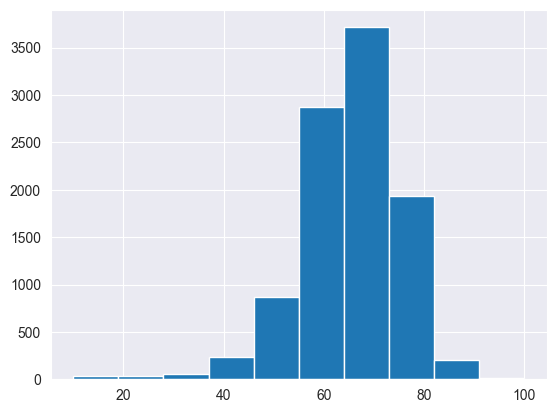

In [111]:
#SOLUTION_START
plt.hist(movies['score'])
plt.show()
#SOLUTION_END

c) We want to visualize which years had the best movies.
 - You have to make a new column containing only the year (last part of 'date column') with 'int16' as data type (you can use .astype() for this).
 - Make sure you delete all scores that are 0, for those are scores that were never filled in
- Plot the average score per year in a line chart with figsize = (15,5)

Text(0.5, 1.0, 'Average movie scores per year')

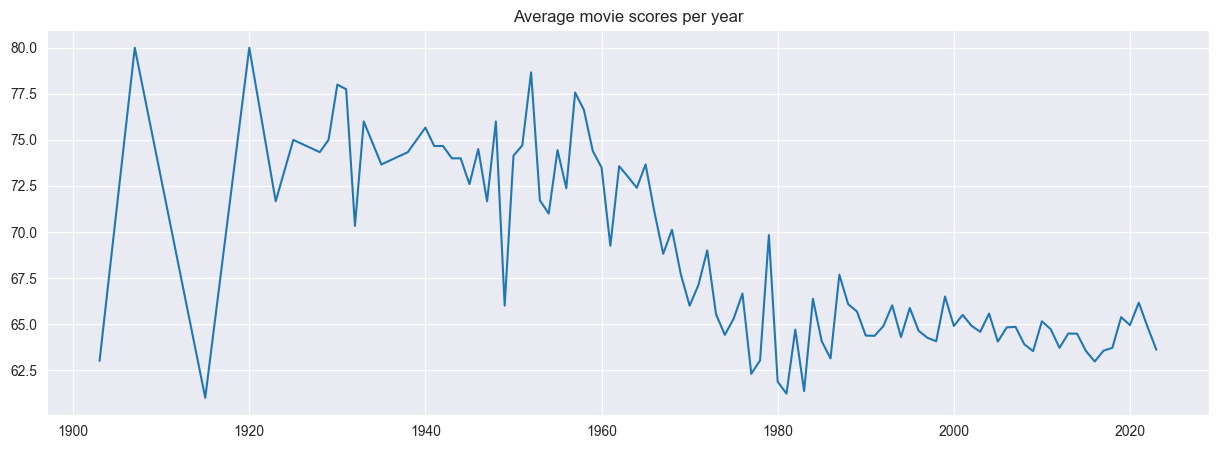

In [112]:
#SOLUTION_START
#Create year column
movies['year'] = movies['date_x'].str.split('/').str.get(2).astype('int16')

#Remove scores that are 0 from the dataset
movies = movies[movies['score']!=0]

#Aggregate data to average score per year
score_years = movies.groupby('year').aggregate({'score':'mean'})
plt.figure(figsize=(15,5))
plt.plot(score_years.index, score_years['score'])
plt.title('Average movie scores per year')
#SOLUTION_END

### 3: Movie budget

a) We want to know what the dispersion of the column 'budget_x' looks like. Make a boxplot to visualize this.

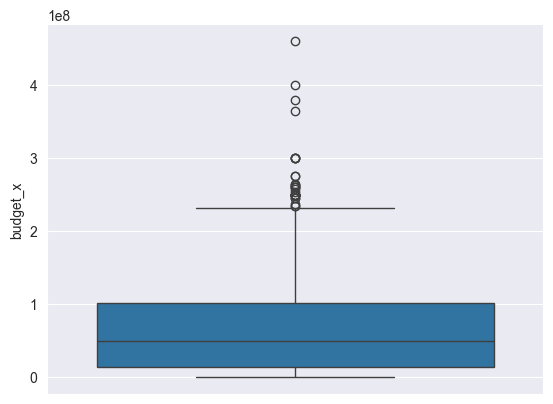

In [110]:
#SOLUTION_START
sns.boxplot(y=movies.budget_x)
plt.show()
#SOLUTION_END

b) Show 5 movies with the highest budget, use a horizontal barchart and show the movie names.

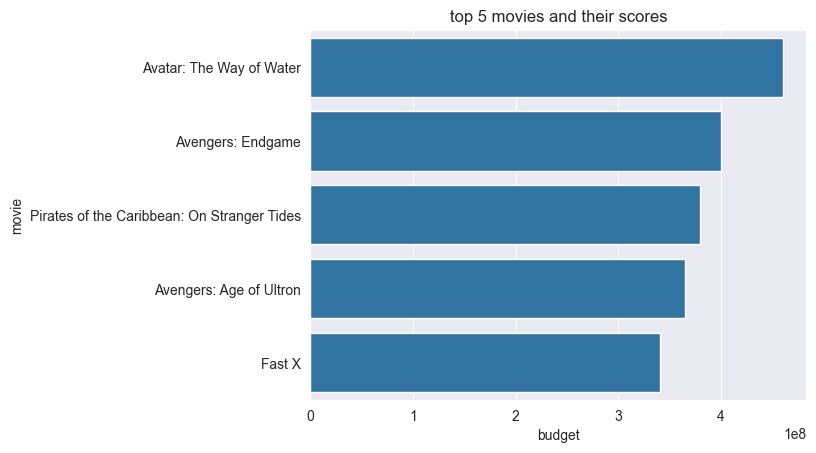

In [5]:
#SOLUTION_START

# Sort the dataset by population in descending order and select the top 5 cities
expensive_movies = movies.sort_values(by='budget_x', ascending=False).head(5)

#Create the barchart
sns.barplot(y=expensive_movies['names'], x=expensive_movies['budget_x'])
plt.xlabel("budget")
plt.ylabel("movie")
plt.title("top 5 movies and their scores")
plt.show()

#SOLUTION_END

c) Let's take a look if these expensive movies resulted in a higher revenue. 
- Make a scatterplot to visualize the relationship between budget and revenue. 
- Set transparency of the dots to 0.3


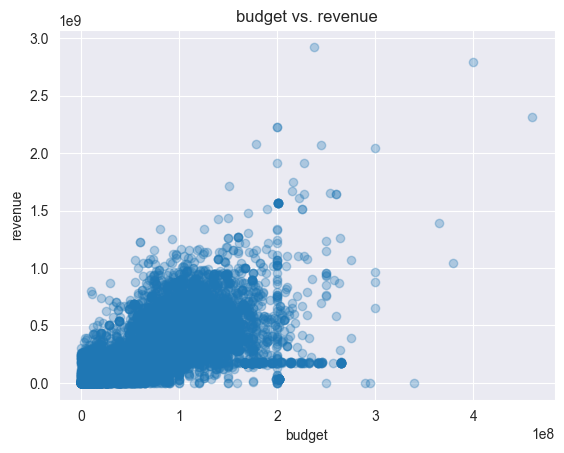

In [6]:
#SOLUTION_START
plt.scatter(movies['budget_x'], movies['revenue'], alpha=0.3)
plt.xlabel('budget')
plt.ylabel('revenue')
plt.title("budget vs. revenue")
plt.show()
#SOLUTION_END